## Twitter Sentiment Analysis
In this notebook, we want to try different models to achieve an accurate model with predicting the tweets sentiments

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## EDA

In [3]:
df_train = pd.read_csv('./data/twitter_training.csv', header=None, names=['tweet_ID', 'entity', 'sentiment', 'tweet content'])
df_val = pd.read_csv('./data/twitter_validation.csv', header=None, names=['tweet_ID', 'entity', 'sentiment', 'tweet content'])

df_train.head()

,tweet_ID,entity,sentiment,tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


We check the shape of the training and validation sets. Notice that we actually use the validation data for testing our models. 

In [4]:
df_train.shape

(74682, 4)

In [5]:
df_val.shape

(1000, 4)

In [6]:
df_train['sentiment'].value_counts()

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

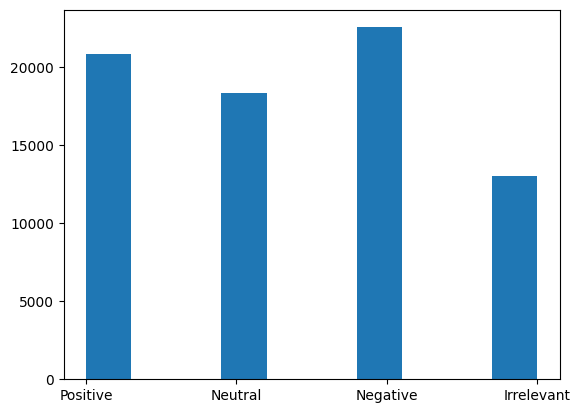

In [14]:
plt.hist(df_train['sentiment'])
plt.show()

In [6]:
df_train.isnull().sum()

tweet_ID           0
entity             0
sentiment          0
tweet content    686
dtype: int64

There are 686 rows which doesn't have content, so we drop them:

In [7]:
df_train.dropna(subset=['tweet content'], inplace=True)

We map 4 different target classes to these four numbers:

* Negative: 0

* Positive: 1

* Neutral: 2

* Irrelevant: 3

In [8]:
df_train['sentiment_num'] = df_train['sentiment'].map({'Negative': 0, 'Positive': 1, 'Neutral': 2, 'Irrelevant': 3})
df_val['sentiment_num'] = df_val['sentiment'].map({'Negative': 0, 'Positive': 1, 'Neutral': 2, 'Irrelevant': 3})

In [9]:
df_train.head()

,tweet_ID,entity,sentiment,tweet content,sentiment_num
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,1
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,1
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,1
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,1
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,1


In [10]:
X_train = df_train['tweet content']
y_train = df_train['sentiment_num']
X_val = df_val['tweet content']
y_val = df_val['sentiment_num']

### Model Selection
We try different classification algorithms, to find out which works well on our test data.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
def train_test_model(X_train, y_train, X_test, y_test, model_):
    model_name, model = model_
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Model:', model_name)
    print('Scores on the test data:')
    print(classification_report(y_test, y_pred))
    print('-' * 40, '\n')

In [20]:
models_dict = {
    'Mutinomial Naive Bayes': MultinomialNB(),
    'K-Nearest Neighbors'   : KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

#### Text Vectorization
We use TF-IDF algorithm to convert each tweet to a vector, and then feed our model with the vectorized data.

In [14]:
v = TfidfVectorizer()

X_train_v = v.fit_transform(X_train)
X_val_v = v.transform(X_val)

In [27]:
for model_name, model in models_dict.items():
    train_test_model(X_train_v, y_train, X_val_v, y_val, (model_name, model))

Model: Mutinomial Naive Bayes
Scores on the test data:
              precision    recall  f1-score   support

           0       0.70      0.94      0.80       266
           1       0.78      0.89      0.83       277
           2       0.91      0.70      0.79       285
           3       0.98      0.60      0.74       172

    accuracy                           0.80      1000
   macro avg       0.84      0.78      0.79      1000
weighted avg       0.83      0.80      0.80      1000

---------------------------------------- 

Model: K-Nearest Neighbors
Scores on the test data:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       266
           1       1.00      0.95      0.97       277
           2       0.93      1.00      0.96       285
           3       1.00      0.99      0.99       172

    accuracy                           0.97      1000
   macro avg       0.98      0.97      0.98      1000
weighted avg       0.97      0.97  

## Conclusion
It is evident that the K-Nearest Neighbors (KNN) algorithm outperformed the other two algorithms on our dataset. 

In fact, we achieved an impressive average F1-score of 97.5% with KNN, indicating its superior performance in accurately classifying the data.